<a href="https://colab.research.google.com/github/ethics11/2022-project/blob/main/5%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C(%ED%9A%A8%EC%9E%90%EB%8F%99).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4주차 과제

## 주제: 2008년 ~ 2021년 14년 동안의 전라북도 20대 ~ 40대 인구 변화

### 지방에 젊은 인구들이 점점 줄어들고 있다는 얘기를 들은 적이 있습니다. 저의 고향인 전라북도의 인구 변화를 직접 확인해보고 싶어 그래프로 나타내보았습니다.

# + 5주차 과제
## 전라북도의 데이터와 인천, 서울, 경기의 데이터를 함께 비교해보기
## (새로운 코드를 작성해보진 못했고 다른 데이터를 추가했습니다.)

In [ ]:
!apt-get install fonts-nanum -qq > /dev/null # 한글폰트설치
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
from google.colab import files
files.upload()

## 1. 전라북도의 20 ~ 40 대 인구 변화


In [ ]:
# 문제 해결 방법 생각해보기
# csv 파일 속 '연령 구간 인구수'에 20대~40대의 인구를 더한 값이 있으므로 그 자료를 활용하기
# 각 연도의 '연령 구간 인구수'를 리스트에 넣기
# 리스트를 그래프로 표현하기


# row[2] = 2008년, row[7] = 2009년, row[12] = 2010년..... row[67] = 2021년.  row[5*i-3] 

[815945, 803641, 795290, 785818, 775096, 767804, 759966, 750750, 740571, 727197, 706579, 686289, 668753, 648435]
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


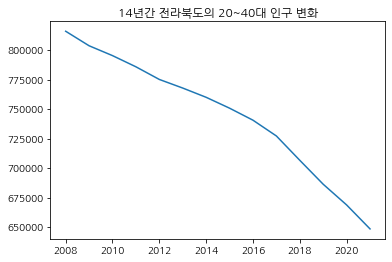

In [ ]:
# 2008 ~ 2021 14년간 전라북도의 20~40대 인구 변화

import csv
data = csv.reader(open('2008-2021.csv'))
next(data)

p = []
y = []

# 전라북도 인구 변화 리스트에 넣기
for row in data :
  if '전라북도' in row[0] :
    for i in range(1, 15) :
      p.append(int(row[5 * i - 3]))
    break

# y축에 들어갈 연도 리스트에 넣기
for x in range(1, 15) :
  y.append(x + 2007)


print(p)
print(y)


import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumGothic')
plt.title('14년간 전라북도의 20~40대 인구 변화')
plt.plot(y, p)
plt.show()


## 결과: 지난 14년간 전라북도의 20 ~ 40대 인구수는 꾸준히 감소했다.

## 2. input을 활용하여 전북 내의 다른 지역도 함께 알아보기

전라북도의 지역 중 20~40대 인구 변화가 궁금한 곳을 입력해주세요: 전주시 덕진구
[135313, 135483, 133635, 131940, 131144, 131244, 130961, 129282, 129713, 128638, 135226, 138842, 139030, 139289]
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


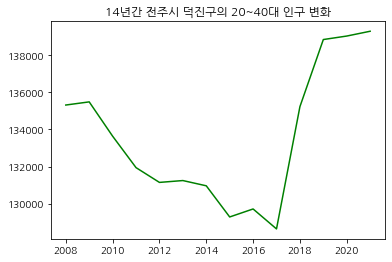

In [ ]:
# input 활용하여 전라북도 지역에 있는 도시들의 20 ~ 40대 인구 변화 알아보기

import csv
data = csv.reader(open('2008-2021.csv'))
next(data)

city = input('전라북도의 지역 중 20~40대 인구 변화가 궁금한 곳을 입력해주세요: ')


p = []
y = []


# 입력된 도시 인구 변화 리스트에 넣기
for row in data :
  if city in row[0] :
    for i in range(1, 15) :
      p.append(int(row[5 * i - 3]))
    break

# y축에 들어갈 연도 리스트에 넣기
for x in range(1, 15) :
  y.append(x + 2007)


print(p)
print(y)


import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumGothic')
plt.title('14년간 ' +city+'의 20~40대 인구 변화')
plt.plot(y, p, c = 'green') 
plt.show()

# 결과
## - 전라북도 내의 모든 지역은 20 ~ 40대 인구수가 줄어들고 있다.


## * 특이했던 부분.
#### 1) 전주시의 20~40대 인구수가 줄어드는 와중에 전주시 덕진구는 2018년도부터 상승했다. 
#### 전주에 사는 친구들에게 전주시 덕진구에 신도시인 에코시티가 생겨 젊은 사람들이 많이 산다는 이야기를 들은 적이 있다.
#### 18년도부터 시작된 인구 증가가 신도시인 에코시티의 영향인가 싶어 찾아보니 그 시기 부터 아파트들의 입주가 시작되었다고 한다.


#### 2) 완주군도 2014~16년에 잠시 증가했다. 이것 역시 당시 완주군에 생긴 전북혁신도시의 영향 때문인지 궁금해졌다.


#### 이런 변화들이 신도시들의 영향인지 정확히 판단할 순 없지만 흥미로웠다.

## 3. 전라북도의 총 인구수 대비 20 ~ 40대 인구수의 비율 구하기
#### - 전라북도의 인구수도 줄고 있기 때문에 자연스럽게 젊은 층의 인구도 줄어드는 것은 아닐까?

[43.96795511517579, 43.334458519456376, 42.55247428654286, 41.931963772210814, 41.37506198818047, 40.9940388635132, 40.60601850862382, 40.15326432801647, 39.71335125491275, 39.21030169734073, 38.467263200989535, 37.730638616275506, 37.06842842762945, 36.28917847279158]
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


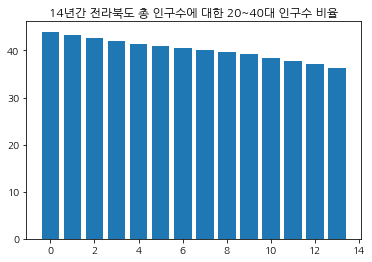

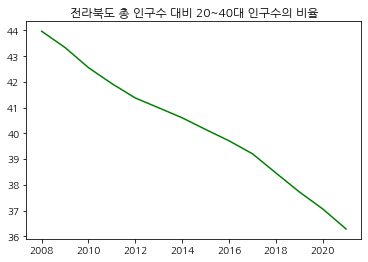

In [ ]:
# 전라북도 20 ~ 40 대 인구수와 총인구수의 비율을 확인해보기
# row[1] = 2008년 총 인구수, row[6] = 2009년 총 인구수, row[11] = 2010년 총 인구수.... 5*i-4

import csv
data = csv.reader(open('2008-2021.csv'))
next(data)

p = []
y = []

# 전라북도 총 인구 수 대비 20 ~ 40대 인구수의 비율을 백분율로 나타내기
for row in data :
  if '전라북도' in row[0] :
    for i in range(1, 15) :
      p.append((int(row[5 * i - 3]) / int(row[5 * i -4])) * 100)  # (20~40대인구수 / 전라북도 총 인구수) * 100
    break

# x축에 들어갈 연도 리스트에 넣기
for x in range(1, 15) :
  y.append(x + 2007)

#### bar 그래프로 그릴 때 x축에 연도를 표시하는 방법을 찾지 못해 그냥 진행했습니다.



print(p)
print(y)



import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumGothic')
plt.title('14년간 전라북도 총 인구수에 대한 20~40대 인구수 비율')
plt.bar(range(14), p)
plt.show()




import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumGothic')
plt.title('전라북도 총 인구수 대비 20~40대 인구수의 비율')
plt.plot(y, p, c = 'green') 
plt.show()

## 분석 결과
#### - 총 인구수가 줄어드는 만큼 20 ~ 40대 인구수도 줄어드는 것이라면 비율은 거의 일정해야하는데 백분율이 2008년 기준 약 43%에서 2021년 기준 약 36%로 줄어들고 있다.
#### - 전라북도의 총 인구수는 점점 감소하고 있으며, 젊은 층의 인구가 더 크게 줄고 있음을 알 수 있다.

# 5주차 추가
# 인천과 서울, 경기도의 20~40대 인구 변화를 같이 확인해보기

[815945, 803641, 795290, 785818, 775096, 767804, 759966, 750750, 740571, 727197, 706579, 686289, 668753, 648435]
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[5311785, 5243732, 5202679, 5106351, 5026965, 4962247, 4901086, 4817083, 4741847, 4674293, 4588934, 4527565, 4463699, 4342336]
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[1383074, 1372132, 1373682, 1375628, 1379555, 1386065, 1380721, 1374116, 1368939, 1356060, 1338186, 1318758, 1291669, 1274208]
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[5792935, 5802282, 5881894, 5875231, 5882641, 5904078, 5903348, 5916977, 5955726, 5970473, 5989856, 5986720, 6014730, 5994889]
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


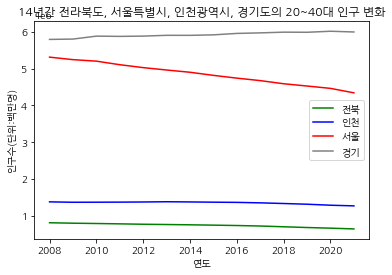

In [ ]:
# 2008 ~ 2021 14년간 전라북도의 20~40대 인구 변화
import csv
data1 = csv.reader(open('2008-2021.csv'))
next(data1)

p = []
y = []

for row in data1 :
  if '전라북도' in row[0] :
    for i in range(1, 15) :
      p.append(int(row[5 * i - 3]))
    break

for x in range(1, 15) :
  y.append(x + 2007)

print(p)
print(y)


# 2008 ~ 2021 14년간 서울특별시의 20~40대 인구 변화
import csv
data2 = csv.reader(open('seoul(2008-2021).csv'))
next(data2)

ps = []
ys = []

for row in data2 :
  if '서울특별시' in row[0] :
    for i in range(1, 15) :
      ps.append(int(row[5 * i - 3]))
    break

for x in range(1, 15) :
  ys.append(x + 2007)

print(ps)
print(ys)


# 2008 ~ 2021 14년간 인천광역시의 20~40대 인구 변화
import csv
data3 = csv.reader(open('incheon(2008-2021).csv'))
next(data3)

pi = []
yi = []

for row in data3 :
  if '인천광역시' in row[0] :
    for i in range(1, 15) :
      pi.append(int(row[5 * i -3]))
    break

for x in range(1, 15) :
  yi.append(x + 2007)

print(pi)
print(yi)


# 2008 ~ 2021 14년간 경기도의 20~40대 인구 변화
import csv
data4 = csv.reader(open('gyungi(2008-2021).csv'))
next(data4)

pg = []
yg = []

for row in data4 :
  if '경기도' in row[0] :
    for i in range(1, 15) :
      pg.append(int(row[5 * i - 3]))
    break

for x in range(1, 15) :
  yg.append(x + 2007)

print(pg)
print(yg)



# 네 가지 데이터를 그래프로 나타내기
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumGothic')
plt.title('14년간 전라북도, 서울특별시, 인천광역시, 경기도의 20~40대 인구 변화')
plt.xlabel('연도')
plt.ylabel('인구수(단위:백만명)')

plt.plot(y, p, label = '전북', c = 'green')
plt.plot(yi, pi, label = '인천', c = 'blue')
plt.plot(ys, ps, label = '서울', c = 'red')
plt.plot(yg, pg, label = '경기', c = 'grey')

plt.legend()
plt.show()

## 데이터 해석 결과
#### 서울, 인천, 전북은 20 ~ 40 대 인구수가 감소하고 있는 것을 알 수 있다.
#### 경기도는 20 ~ 40 대 인구수가 증가하고 있음을 알 수 있다.

[51.300031596852506, 50.62803812362519, 49.90313594514188, 49.21694520966223, 48.64380678919788, 48.25710299371538, 47.77010203247657, 47.25036466051875, 46.833600958733264, 46.376586107001806, 45.80397583480135, 45.21805912626497, 44.795737905687744, 44.1923342019616]
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


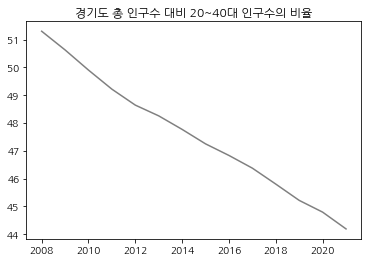

In [ ]:
# 경기도의 총 인구 대비 20 ~ 40 대 인구수의 비율을 백분율로 나타내기

import csv
data4 = csv.reader(open('gyungi(2008-2021).csv'))
next(data4)

p = []
y = []

# 경기도 총 인구 수 대비 20 ~ 40대 인구수의 비율을 백분율로 나타내기
for row in data4 :
  if '경기도' in row[0] :
    for i in range(1, 15) :
      p.append((int(row[5 * i - 3]) / int(row[5 * i -4])) * 100)  # (20~40대인구수 / 경기도 총 인구수) * 100
    break

# x축에 들어갈 연도 리스트에 넣기
for x in range(1, 15) :
  y.append(x + 2007)

print(p)
print(y)

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumGothic')
plt.title('경기도 총 인구수 대비 20~40대 인구수의 비율')
plt.plot(y, p, c = 'grey') 
plt.show()

## 경기도는 최근 14년간 20 ~ 40대의 인구수가 증가하고 있다. 하지만 경기도 총 인구수 대비 20~40대 인구수의 비율은 감소하고 있다.
## 20~40대 인구수가 늘어나고 있음에도 비율은 감소하고 있는 것을 보아 경기도의 총 인구가 더 크게 늘어나고 있음을 알 수 있다.